In [0]:
!pip install -U -q PyDrive        #machine learning libraries
!pip install -q keras
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
from skimage import io
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV as gsc
import pickle



/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
from keras.models import Sequential   #DeepLearning Libraries
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Image file loaded**

In [0]:
train_image = drive.CreateFile({'id' : '1D2clbBveWZ9H8JGL6a3SVBpHHp_YF9iB'})
train_image.GetContentFile('train.csv')

In [0]:
train_data = pd.read_csv('train.csv')

In [0]:
train_data_y = train_data.label.as_matrix()

In [0]:
train_data_x = np.matrix(train_data.values[:,1:])

In [0]:
train_data_y

array([1, 0, 1, ..., 7, 6, 9])

In [0]:
train_data_x


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

**Splitting the dataset into training and testing sets.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size = 0.2, random_state = 92)  

**Displaying random image visualisation from pixels for the training data**

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


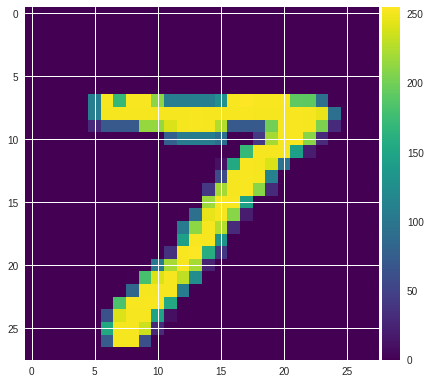

In [0]:
io.imshow(np.reshape(X_train[699],(28,28)))

In [0]:
y_train[699]

7

**Creating a logistic regression model for setting a baseline accuracy. Convolutional NeuralNets have to perform better than this atleast.**

In [0]:
parameters = {'C' : [0.01]}
clf=gsc(LR(),parameters,verbose = 5)

In [0]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.8917350946090682, total= 6.5min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


[CV] ................. C=0.01, score=0.9008928571428572, total= 6.9min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.4min remaining:    0.0s


[CV] ................. C=0.01, score=0.8964808860307253, total= 7.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

**Model Trained ... Dumping trained model to a pickle file**

In [0]:
pickle.dump(clf,open("LRModel.p","wb"))

**The Sigmoidal Model accuracy. Looks like i gotta make pretty awesome conv layers to achieve this min accuracy. **

In [0]:
clf.score(X_test,y_test)

0.9048809523809523

In [0]:
X_train_K = np.array(X_train).reshape(33600,28,28,1)   #playin around !
X_test_K = np.array(X_test).reshape(8400,28,28,1)

In [0]:
y_test.shape

(8400,)

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
y_train.shape

(33600, 10)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='valid', activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
__________

In [0]:
model.fit(X_train_K, y_train, validation_data=(X_test_K, y_test), epochs=25, batch_size=300)

Train on 33600 samples, validate on 8400 samples
Epoch 1/25
33600/33600 [==============================] - 5s 137us/step - loss: 1.0972 - acc: 0.8442 - val_loss: 0.0871 - val_acc: 0.9742
Epoch 2/25
33600/33600 [==============================] - 4s 119us/step - loss: 0.0806 - acc: 0.9742 - val_loss: 0.0589 - val_acc: 0.9810
Epoch 3/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0536 - acc: 0.9830 - val_loss: 0.0530 - val_acc: 0.9833
Epoch 4/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0384 - acc: 0.9877 - val_loss: 0.0490 - val_acc: 0.9860
Epoch 5/25
12900/33600 [==========>...................] - ETA: 2s - loss: 0.0323 - acc: 0.9909

33600/33600 [==============================] - 4s 118us/step - loss: 0.0310 - acc: 0.9902 - val_loss: 0.0426 - val_acc: 0.9875
Epoch 6/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0218 - acc: 0.9926 - val_loss: 0.0452 - val_acc: 0.9873
Epoch 7/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0201 - acc: 0.9935 - val_loss: 0.0494 - val_acc: 0.9876
Epoch 8/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0451 - val_acc: 0.9883
Epoch 9/25
30900/33600 [==========================>...] - ETA: 0s - loss: 0.0166 - acc: 0.9945

33600/33600 [==============================] - 4s 117us/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0455 - val_acc: 0.9876
Epoch 10/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0172 - acc: 0.9938 - val_loss: 0.0411 - val_acc: 0.9887
Epoch 11/25
33600/33600 [==============================] - 4s 116us/step - loss: 0.0113 - acc: 0.9963 - val_loss: 0.0570 - val_acc: 0.9864
Epoch 12/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0127 - acc: 0.9958 - val_loss: 0.0500 - val_acc: 0.9869
Epoch 13/25
30900/33600 [==========================>...] - ETA: 0s - loss: 0.0120 - acc: 0.9958

33600/33600 [==============================] - 4s 118us/step - loss: 0.0122 - acc: 0.9958 - val_loss: 0.0494 - val_acc: 0.9886
Epoch 14/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0581 - val_acc: 0.9875
Epoch 15/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0109 - acc: 0.9964 - val_loss: 0.0524 - val_acc: 0.9871
Epoch 16/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0094 - acc: 0.9967 - val_loss: 0.0612 - val_acc: 0.9870
Epoch 17/25
30900/33600 [==========================>...] - ETA: 0s - loss: 0.0152 - acc: 0.9949

33600/33600 [==============================] - 4s 117us/step - loss: 0.0141 - acc: 0.9953 - val_loss: 0.0803 - val_acc: 0.9855
Epoch 18/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0105 - acc: 0.9964 - val_loss: 0.0463 - val_acc: 0.9886
Epoch 19/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0084 - acc: 0.9974 - val_loss: 0.0487 - val_acc: 0.9883
Epoch 20/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0094 - acc: 0.9968 - val_loss: 0.0647 - val_acc: 0.9868
Epoch 21/25
30900/33600 [==========================>...] - ETA: 0s - loss: 0.0092 - acc: 0.9968

33600/33600 [==============================] - 4s 118us/step - loss: 0.0087 - acc: 0.9970 - val_loss: 0.0495 - val_acc: 0.9886
Epoch 22/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0070 - acc: 0.9974 - val_loss: 0.0601 - val_acc: 0.9876
Epoch 23/25
33600/33600 [==============================] - 4s 117us/step - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0516 - val_acc: 0.9882
Epoch 24/25
33600/33600 [==============================] - 4s 118us/step - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0599 - val_acc: 0.9887
Epoch 25/25
31500/33600 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.9979

33600/33600 [==============================] - 4s 118us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.0559 - val_acc: 0.9894


In [0]:
scores = model.evaluate(X_test_K,y_test,verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.94%


**Voila!!! a whopping 98.94 % accuracy **

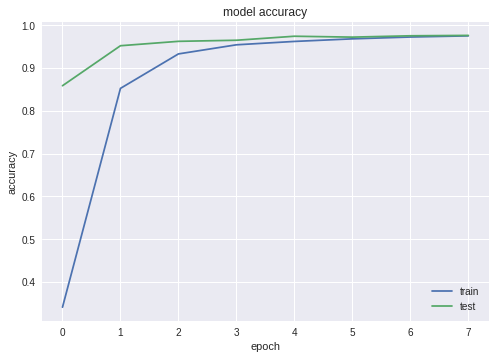

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

**Plotted model accuracy with epochs. Its a monotonic increasing curve!! Much expected**

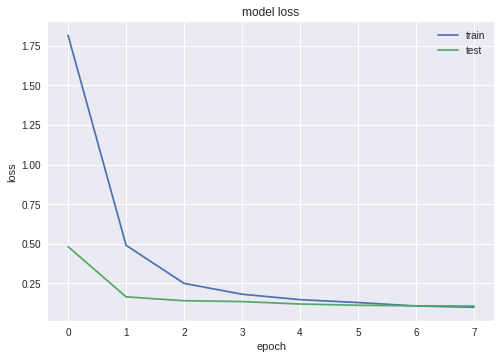

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

** Model Loss v/s Epochs. No overfittings as such! **